In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

<function matplotlib.pyplot.show(close=None, block=None)>

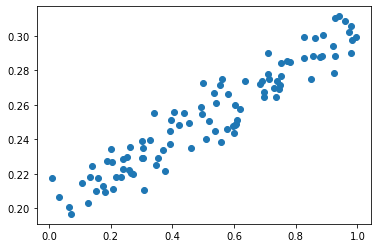

In [2]:
x_data = np.random.rand(100)
noise = np.random.normal(0,0.01,x_data.shape)
y_data = x_data*0.1 + 0.2 + noise

#print("x_data:")
#print(x_data)
#print("noise:")
#print(noise)
#print("y_data:")
#print(y_data)
plt.scatter(x_data, y_data)
plt.show

In [3]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

In [4]:
# 把numpy数据变成tensor
x_data = torch.FloatTensor(x_data)
y_data = torch.FloatTensor(y_data)

inputs = Variable(x_data)
target = Variable(y_data)

In [5]:
# 构建神经网络模型
# 一般把网络中具有可学习参数的层放在_init_()中
class LinearRegression(nn.Module):
    # 定义网络结构
    def __init__(self):
        # 初始化nn.Module
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(1,1)
    
    # 定义网络计算
    def forward(self,x):
        out = self.fc(x)
        return out

In [6]:
# 定义模型
model = LinearRegression()
# 定义损失函数
mse_loss = nn.MSELoss()
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [7]:
for name, parameters in model.named_parameters():
    print('name:{}, param:{}'.format(name,parameters))

name:fc.weight, param:Parameter containing:
tensor([[-0.2301]], requires_grad=True)
name:fc.bias, param:Parameter containing:
tensor([-0.1981], requires_grad=True)


In [8]:
for i in range(10001):
    out = model(inputs)
    # 计算loss
    loss = mse_loss(out, target)
    # 梯度清0
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 修改权值
    optimizer.step()
    if i%1000 ==0:
        print(i, loss.item())

0 0.33545395731925964
1000 0.00014638842549175024
2000 9.605126251699403e-05
3000 9.098159353015944e-05
4000 9.047098137671128e-05
5000 9.041960583999753e-05
6000 9.041439625434577e-05
7000 9.041385783348233e-05
8000 9.041382145369425e-05
9000 9.04137923498638e-05
10000 9.04137923498638e-05


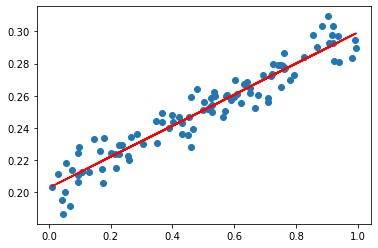

In [39]:
y_pred = model(inputs)
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data.numpy(),'r-')